In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# Creating Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [8]:
# Compiling Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=10)


Epoch 1/10


1875/1875 [==============================] - 23s 11ms/step - loss: 0.4696 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3185 - accuracy: 0.8848
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2731 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2410 - accuracy: 0.9112
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2193 - accuracy: 0.9190
Epoch 6/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1994 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1816 - accuracy: 0.9324
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1658 - accuracy: 0.9380
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1527 - accuracy: 0.9433
Epoch 10/10
1875/1875 [==============================] - 19s 

In [9]:
test_loss = model.evaluate(test_images, test_labels)
test_loss

313/313 [==============================] - 2s 6ms/step - loss: 0.2898 - accuracy: 0.9060


[0.28984495997428894, 0.906000018119812]

### Visualizing the Convolutions and Pooling

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 35ms/step


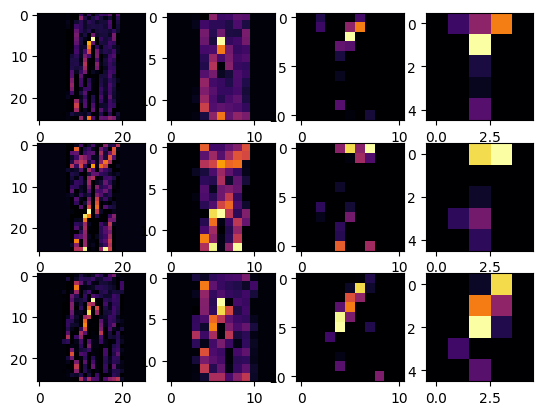

In [15]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 5

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)